In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the time module.
import time
# Import linregress
from scipy.stats import linregress


# Get today's date in seconds.
today = time.strftime("%x")
today

'07/23/21'

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59073a7282868a59862fa5b9847711f9'

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | pisco
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | coahuayana
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | launceston
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | makakilo city
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | alofi
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | garowe
Processing Record 16 of Set 1 | cayenne
Processing Record 17 of Set 1 | mayumba
Processing Record 18 of Set 1 | tucuman
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | zagyvaszanto
Processing Record 22 of Set 1 | kavaratti
Processing Record 23 of Set 1 | norman w

Processing Record 39 of Set 4 | farah
Processing Record 40 of Set 4 | mount isa
Processing Record 41 of Set 4 | severo-kurilsk
Processing Record 42 of Set 4 | sabaudia
Processing Record 43 of Set 4 | khor
Processing Record 44 of Set 4 | port lincoln
Processing Record 45 of Set 4 | ugoofaaru
Processing Record 46 of Set 4 | maloy
Processing Record 47 of Set 4 | zuwarah
Processing Record 48 of Set 4 | bubaque
Processing Record 49 of Set 4 | fortuna
Processing Record 50 of Set 4 | thinadhoo
Processing Record 1 of Set 5 | hualmay
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | pangai
Processing Record 4 of Set 5 | saleaula
City not found. Skipping...
Processing Record 5 of Set 5 | san quintin
Processing Record 6 of Set 5 | sept-iles
Processing Record 7 of Set 5 | wladyslawowo
Processing Record 8 of Set 5 | chernigovka
Processing Record 9 of Set 5 | lipin bor
Processing Record 10 of Set 5 | adrar
Processing Record 11 of Set 5 | aklavik
Processing Record 12 of Set 5 | l

Processing Record 29 of Set 8 | balkanabat
Processing Record 30 of Set 8 | amderma
City not found. Skipping...
Processing Record 31 of Set 8 | vlore
Processing Record 32 of Set 8 | lata
Processing Record 33 of Set 8 | shihezi
Processing Record 34 of Set 8 | buraydah
Processing Record 35 of Set 8 | vagay
Processing Record 36 of Set 8 | tasiilaq
Processing Record 37 of Set 8 | luderitz
Processing Record 38 of Set 8 | arroyo
Processing Record 39 of Set 8 | campos
Processing Record 40 of Set 8 | tepalcatepec
Processing Record 41 of Set 8 | fort abbas
Processing Record 42 of Set 8 | chanderi
Processing Record 43 of Set 8 | ballina
Processing Record 44 of Set 8 | humboldt
Processing Record 45 of Set 8 | taltal
Processing Record 46 of Set 8 | ampanihy
Processing Record 47 of Set 8 | stefanesti
Processing Record 48 of Set 8 | bargal
City not found. Skipping...
Processing Record 49 of Set 8 | caravelas
Processing Record 50 of Set 8 | kovdor
Processing Record 1 of Set 9 | chuncheng
Processing Re

Processing Record 18 of Set 12 | madang
Processing Record 19 of Set 12 | sundern
Processing Record 20 of Set 12 | marshall
Processing Record 21 of Set 12 | kieta
Processing Record 22 of Set 12 | ust-maya
Processing Record 23 of Set 12 | sungaipenuh
Processing Record 24 of Set 12 | port keats
Processing Record 25 of Set 12 | colares
Processing Record 26 of Set 12 | rio gallegos
Processing Record 27 of Set 12 | salmas
Processing Record 28 of Set 12 | prainha
Processing Record 29 of Set 12 | saquarema
Processing Record 30 of Set 12 | aventura
Processing Record 31 of Set 12 | brenham
Processing Record 32 of Set 12 | salto
Processing Record 33 of Set 12 | nuuk
Processing Record 34 of Set 12 | chaoyang
Processing Record 35 of Set 12 | rybnaya sloboda
Processing Record 36 of Set 12 | banda aceh
Processing Record 37 of Set 12 | fairbanks
Processing Record 38 of Set 12 | rancho palos verdes
Processing Record 39 of Set 12 | mabaruma
Processing Record 40 of Set 12 | odesskoye
Processing Record 41

In [7]:
len(city_data)

563

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,35.62,93,90,17.27,US,2021-07-23 16:18:02
1,Pisco,-13.7000,-76.2167,65.01,72,75,2.30,PE,2021-07-23 16:20:26
2,Puerto Ayora,-0.7393,-90.3518,76.96,82,100,8.99,EC,2021-07-23 16:19:55
3,Coahuayana,18.7333,-103.6833,87.28,66,94,2.33,MX,2021-07-23 16:26:02
4,Kaitangata,-46.2817,169.8464,44.92,75,59,5.53,NZ,2021-07-23 16:19:57
5,Launceston,-41.4500,147.1667,45.16,97,90,5.75,AU,2021-07-23 16:26:58
6,Bredasdorp,-34.5322,20.0403,51.12,71,1,9.22,ZA,2021-07-23 16:19:50
7,Makakilo City,21.3469,-158.0858,77.32,73,90,3.44,US,2021-07-23 16:24:23
8,Qaanaaq,77.4840,-69.3632,42.21,61,87,2.89,GL,2021-07-23 16:20:06
9,Atuona,-9.8000,-139.0333,76.68,75,51,11.68,PF,2021-07-23 16:19:54


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-07-23 16:18:02,71.2906,-156.7887,35.62,93,90,17.27
1,Pisco,PE,2021-07-23 16:20:26,-13.7000,-76.2167,65.01,72,75,2.30
2,Puerto Ayora,EC,2021-07-23 16:19:55,-0.7393,-90.3518,76.96,82,100,8.99
3,Coahuayana,MX,2021-07-23 16:26:02,18.7333,-103.6833,87.28,66,94,2.33
4,Kaitangata,NZ,2021-07-23 16:19:57,-46.2817,169.8464,44.92,75,59,5.53
5,Launceston,AU,2021-07-23 16:26:58,-41.4500,147.1667,45.16,97,90,5.75
6,Bredasdorp,ZA,2021-07-23 16:19:50,-34.5322,20.0403,51.12,71,1,9.22
7,Makakilo City,US,2021-07-23 16:24:23,21.3469,-158.0858,77.32,73,90,3.44
8,Qaanaaq,GL,2021-07-23 16:20:06,77.4840,-69.3632,42.21,61,87,2.89
9,Atuona,PF,2021-07-23 16:19:54,-9.8000,-139.0333,76.68,75,51,11.68


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


## Data plots

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

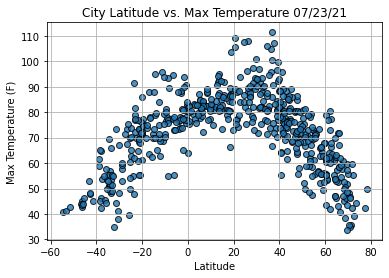

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

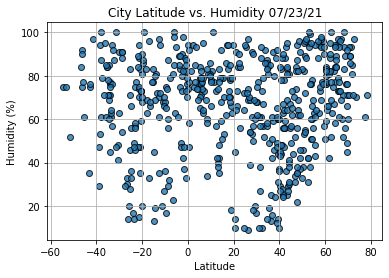

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

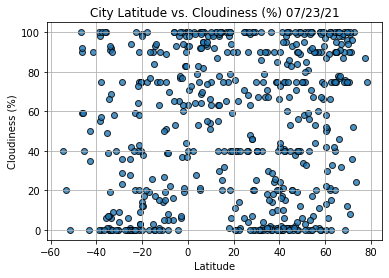

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

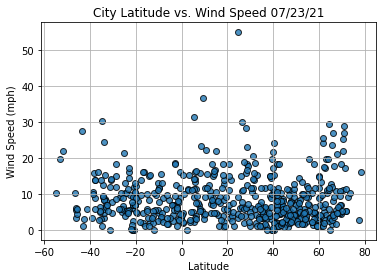

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## adding linear regression

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

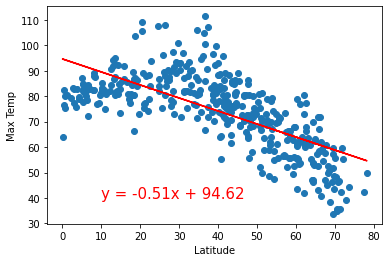

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

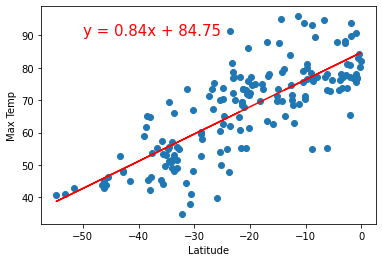

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

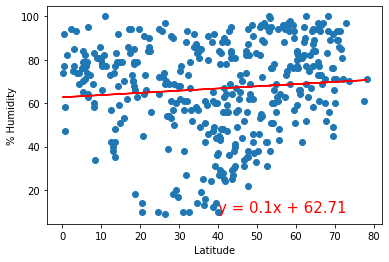

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

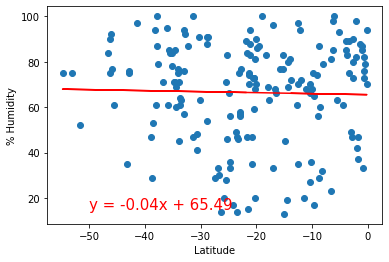

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

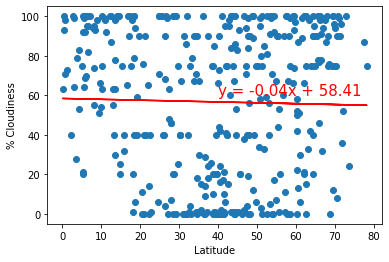

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,60))

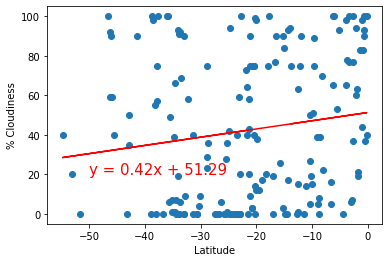

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

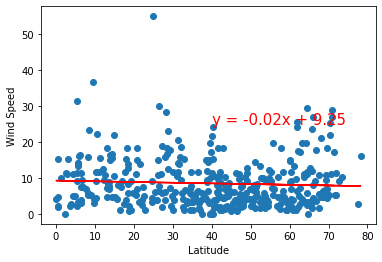

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

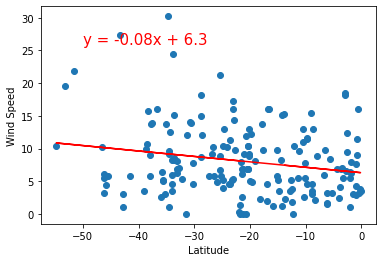

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,26))
